# 统计与大数据分析软件第十一次作业

## 第一题

### （a）重新创建输出

Re-create exactly the following output:

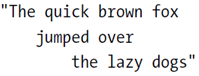

这一步使用换行符号和制表符号即可实现。需要注意：`\t`通常用于表示一个制表符（8个空格），而不是4个空格。

In [1]:
cat("\"The quick brown fox\n    jumped over\n\tthe lazy dogs\"")

"The quick brown fox
    jumped over
	the lazy dogs"

### （b）存钱（字符串）相关

Store the string "Two 6-packs for $16.99". Then do the following:

1. Use a check for equality to confirm that the substring beginning with character 5 and ending with character 10 is "6-pack".
2. Make it a better deal by changing the price to $14.99.

首先，我们将上面的字符串（Two 6-packs for $16.99）存储进入变量中。

In [2]:
deal <- "Two 6-packs for $16.99"

1. 检查要求区间的字符是否符合要求，我们使用`substr`函数进行字符串分割，然后与目标比较：

In [3]:
substring_check <- substr(deal, 5, 10) == "6-pack"
cat("Substring is '6-pack':", substring_check, "\n")

Substring is '6-pack': TRUE 


2. 修改价格，这里使用`sub`函数，将目标替换的值进行替换：

In [4]:
deal_better <- sub("\\$16", "$14", deal)    # deal_better <- sub("\\$16\\.99", "$14.99", deal)也可以
cat("Updated deal:", deal_better, "\n")

Updated deal: Two 6-packs for $14.99 


> 需要注意的是，为了避免出现重复，我们使用`sub`函数的时候前两个参数的长度可以增加一些，防止其他数据被无辜替代。
> 
> 例如，如果只把6换成4的话，前面的6显然也会被替代。

## 第二题

Create a list that contains, in this order, 

> a **sequence** of 20 evenly spaced numbers between -4 and 4;
>
> a 3 * 3 **matrix** of the logical vector c(F,T,T,T,F,T,T,F,F) filled column-wise;
>
> a **character vector** with the two strings "don" and "quixote";
>
> and a **factor vector** containing the observations c("LOW","MED","LOW","MED","MED","HIGH").

Then, do the following:

1. Extract row elements 2 and 1 of columns 2 and 3, in that order, of the logical matrix.
2. Use sub to overwrite "quixote" with "Quixote" and "don" with "Don" inside the list. Then, using the newly overwritten list member, concatenate to the console screen the following statement exactly:

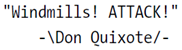

3. Obtain all values from the sequence between -4 and 4 that are greater than 1.
4. Determine which values in the factor vector are assigned the "MED" level.

首先，我们进行列表的创建：

In [5]:
# 创建各个元素
seq_vec <- seq(-4, 4, length.out = 20)
log_mat <- matrix(c(FALSE, TRUE, TRUE, TRUE, FALSE, TRUE, TRUE, FALSE, FALSE), nrow = 3, byrow = FALSE)
char_vec <- c("don", "quixote")
factor_vec <- factor(c("LOW", "MED", "LOW", "MED", "MED", "HIGH"))

# 创建列表
my_list <- list(seq_vec, log_mat, char_vec, factor_vec)

In [6]:
print(my_list)

[[1]]
 [1] -4.0000000 -3.5789474 -3.1578947 -2.7368421 -2.3157895 -1.8947368
 [7] -1.4736842 -1.0526316 -0.6315789 -0.2105263  0.2105263  0.6315789
[13]  1.0526316  1.4736842  1.8947368  2.3157895  2.7368421  3.1578947
[19]  3.5789474  4.0000000

[[2]]
      [,1]  [,2]  [,3]
[1,] FALSE  TRUE  TRUE
[2,]  TRUE FALSE FALSE
[3,]  TRUE  TRUE FALSE

[[3]]
[1] "don"     "quixote"

[[4]]
[1] LOW  MED  LOW  MED  MED  HIGH
Levels: HIGH LOW MED



### （a）矩形数据的提取

数据的第二个索引是矩阵，我们先进行提取：

In [7]:
mat <- my_list[[2]]
print(mat)

      [,1]  [,2]  [,3]
[1,] FALSE  TRUE  TRUE
[2,]  TRUE FALSE FALSE
[3,]  TRUE  TRUE FALSE


然后提取指定元素（按顺序：第2列第2行、第3列第1行）：

In [8]:
elements <- c(mat[2,2], mat[1,3])
print(elements)

[1] FALSE  TRUE


### （b）替换字符串并输出

数组的第三个元素是字符串，我们进行提取：

In [9]:
char_data <- my_list[[3]]
print(char_data)

[1] "don"     "quixote"


接下来，我们进行替换：

In [10]:
char_data[char_data == "don"] <- sub("don","Don",char_data[char_data == "don"])
char_data[char_data == "quixote"] <- sub("quixote","Quixote",char_data[char_data == "quixote"])
print(char_data)

[1] "Don"     "Quixote"


然后，我们将字符串和向量连接起来。使用signature变量，它来自paste0这个函数，将每个元素以空格分格并转换成字符串：

In [11]:
signature <- paste0("-\\", paste(char_data, collapse = " "), "/-")
cat("“Windmills! Attack!”\n    ", signature, sep = "")

“Windmills! Attack!”
    -\Don Quixote/-

### （c）提取数组中大于特定数字的数

数据的第一个元素是序列，我们进行提取：

In [12]:
seq_data <- my_list[[1]]
print(seq_data)

 [1] -4.0000000 -3.5789474 -3.1578947 -2.7368421 -2.3157895 -1.8947368
 [7] -1.4736842 -1.0526316 -0.6315789 -0.2105263  0.2105263  0.6315789
[13]  1.0526316  1.4736842  1.8947368  2.3157895  2.7368421  3.1578947
[19]  3.5789474  4.0000000


接下来，获取大于1的值

In [13]:
greater_than_1 <- seq_data[seq_data > 1]
print("元素：", greater_than_1)
index <- which(seq_data > 1)
print("索引：", index)

[1] "元素："
[1] "索引："


### （d）判断因子里面是否存在某值

数据的第四个元素是因子，我们提取因子向量：

In [14]:
factors <- my_list[[4]]
print(factors)

[1] LOW  MED  LOW  MED  MED  HIGH
Levels: HIGH LOW MED


判断哪些元素是`MED`

In [15]:
is_med <- factors == "MED"
print(is_med)

[1] FALSE  TRUE FALSE  TRUE  TRUE FALSE


## 第三题

### （a）大数数组处理

Store the following vector:

In [16]:
foo <- c(13563,-14156,-14319,16981,12921,11979,9568,8833,-12968,8133)
print(foo)

 [1]  13563 -14156 -14319  16981  12921  11979   9568   8833 -12968   8133



Then, do the following:


1. Output all elements of foo that, when raised to a power of 75, are not infinite.

要判断一个数组每个数的75次方是否为无穷，我们可以先进行相关操作：

In [17]:
LargeNumber <- foo^75
print(LargeNumber)

 [1]           Inf          -Inf          -Inf           Inf           Inf
 [6] 7.612764e+305 3.644077e+298 9.080657e+295          -Inf 1.856983e+293


显然不行，那么我们进行筛选：

In [18]:
not_infinite <- foo[!is.infinite(LargeNumber)]
cat("Not infinite when raised to power 75:\n")
print(not_infinite)

Not infinite when raised to power 75:
[1] 11979  9568  8833  8133


2. Return the elements of foo deleting those that, when raised to a power of 75, are negative infinity.

筛选那些75次方不会产生负无穷的数字：

In [19]:
not_neg_infinite <- foo[!(LargeNumber == -Inf)]
cat("Elements not resulting in -Inf when raised to power 75:\n")
print(not_neg_infinite)

Elements not resulting in -Inf when raised to power 75:
[1] 13563 16981 12921 11979  9568  8833  8133


### （b）NA数组存储

Create and store a list containing a single member: the vector c(7,7,NA,3,NA,1,1,5,NA). Then, do the following:

1. Name the member "alpha".
2. Formally confirm using the appropriate logical-valued function that the list does not have a member with the name "beta".
3. Incorporate into the list a new member called beta, which is the vector obtained by identifying the index positions of alpha that are NA.

首先，创建并存储列表

In [20]:
my_list <- list(c(7,7,NA,3,NA,1,1,5,NA))
print(my_list)

[[1]]
[1]  7  7 NA  3 NA  1  1  5 NA



1. 接下来，对成员进行命名：

In [21]:
names(my_list) <- "alpha"
print(my_list)

$alpha
[1]  7  7 NA  3 NA  1  1  5 NA



2. 使用逻辑值函数确认没有名为 "beta" 的成员

In [22]:
has_beta <- "beta" %in% names(my_list)
cat("List has 'beta' member:", has_beta, "\n")  # 应该输出 FALSE

List has 'beta' member: FALSE 


3. 添加名为 "beta" 的新成员，内容为 alpha 中 NA 的索引位置

In [23]:
my_list$beta <- which(is.na(my_list$alpha))
print(my_list)

$alpha
[1]  7  7 NA  3 NA  1  1  5 NA

$beta
[1] 3 5 9



### （c）矩阵相关

Store the following matrix:

In [24]:
m <- matrix(c(
  34, 0, 1,
  23, 1, 2,
  33, 1, 1,
  42, 0, 1,
  41, 0, 2
), ncol = 3, byrow = TRUE)

Then, do the following:

1. Coerce the matrix to a data frame.
2. As a data frame, coerce the second column to be logical valued.
3. As a data frame, coerce the third column to be factor-valued.

我们在刚开始已经创建好了矩阵，现在打印出来看一下：

In [25]:
print(m)

     [,1] [,2] [,3]
[1,]   34    0    1
[2,]   23    1    2
[3,]   33    1    1
[4,]   42    0    1
[5,]   41    0    2


1. 接下来，我们将矩阵转换成data frame的形式：

In [26]:
df <- as.data.frame(m)
print(df)

  V1 V2 V3
1 34  0  1
2 23  1  2
3 33  1  1
4 42  0  1
5 41  0  2


2. 按照要求，将第二列转换为逻辑值：

In [27]:
df[[2]] <- as.logical(df[[2]])
print(df)

  V1    V2 V3
1 34 FALSE  1
2 23  TRUE  2
3 33  TRUE  1
4 42 FALSE  1
5 41 FALSE  2


3. 将第三列转换为因子

In [28]:
df[[3]] <- as.factor(df[[3]])
print(df)

  V1    V2 V3
1 34 FALSE  1
2 23  TRUE  2
3 33  TRUE  1
4 42 FALSE  1
5 41 FALSE  2


这里好像看不出来因子变换对于数据有什么影响，我们进一步展开：

In [29]:
print(df[[3]])

[1] 1 2 1 1 2
Levels: 1 2


这样就看出来了，factor是一个向量对象，用于指定其他向量的离散分类（分组）。